In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

headers = re.findall('\s+\w+', """ bytes    packets errs drop fifo frame compressed multicast  bytes    packets errs drop fifo colls carrier compressed""")
headers = [x.strip() for x in headers]
for i in range(len(headers)):
    if i < 8:
        headers[i] = "received-" + headers[i]
    else:
        headers[i] = "sent-" + headers[i]
# print(headers)

def process_line(line):
    d = {}
    if line.split(':')[0].strip() == 'wlan0':
        d['interface'] = 'wlan0'
    elif line.split(':')[0].strip() == 'p2p-wlan0-0':
        d['interface'] = 'p2p-wlan0-0'
    else:
        return None
    line = line.split(':')[1]
    res = re.findall('\s+\w+', line)
    res = [x.strip() for x in res]
    d.update({_[0] : _[1] for _ in zip(headers, res)})

    return pd.DataFrame(d, index=[0])


def create_dataframe(file_path):
    df = pd.DataFrame()
    for line in open(file_path, 'r', encoding='utf-16'):
        new_d = process_line(line)
        if new_d is not None:
            df = df.append(new_d)

#     df.index.name = 'timestamp'
#     df = df.reset_index()

    df['device'] = file_path.split('\\')[1]
    df['app'] = file_path.split('\\')[2].strip('-W')
    df['app_details'] = file_path.split('\\')[3]
    df['is_record'] = 'record' in file_path.split('\\')[4]
    df['is_wireless'] = '-W' in file_path.split('\\')[2]
    df['repetition'] = file_path.split('\\')[4].strip('record') if 'record' in file_path.split('\\')[4] else file_path.split('\\')[4].strip('replay')

    df.to_csv(f'.\\{file_path.strip(".log")}.csv', index=False)

    return df

def process_network():
    df_aggregated = pd.DataFrame()
    for root, dirs, files in os.walk(".", topdown=False):
        for name in files:
            if name == 'net_dev.log':
                print(os.path.join(root, name))
                df_aggregated = pd.concat([df_aggregated, create_dataframe(os.path.join(root, name))]) 
    # df_aggregated
    return df_aggregated


In [29]:
import warnings
warnings.filterwarnings("ignore")

df = process_network()
df[headers] = df[headers].apply(pd.to_numeric)
df

.\Quest-2\BeatSaber\PopStars-Easy\record0\net_dev.log
.\Quest-2\BeatSaber\PopStars-Easy\replay0.0\net_dev.log
.\Quest-2\BeatSaber\PopStars-Easy\replay0.1\net_dev.log
.\Quest-2\BeatSaber\PopStars-Easy\replay0.2\net_dev.log
.\Quest-2\BeatSaber\PopStars-Hard\record0\net_dev.log
.\Quest-2\BeatSaber\PopStars-Hard\replay0.0\net_dev.log
.\Quest-2\BeatSaber\PopStars-Hard\replay0.1\net_dev.log
.\Quest-2\BeatSaber\PopStars-Hard\replay0.2\net_dev.log
.\Quest-2\BeatSaber\PopStars-Medium\record0\net_dev.log
.\Quest-2\BeatSaber\PopStars-Medium\record1\net_dev.log
.\Quest-2\BeatSaber\PopStars-Medium\record2\net_dev.log
.\Quest-2\BeatSaber\PopStars-Medium\record3\net_dev.log
.\Quest-2\BeatSaber\PopStars-Medium\record4\net_dev.log
.\Quest-2\BeatSaber\PopStars-Medium\replay0.0\net_dev.log
.\Quest-2\BeatSaber\PopStars-Medium\replay0.1\net_dev.log
.\Quest-2\BeatSaber\PopStars-Medium\replay0.2\net_dev.log
.\Quest-2\BeatSaber-W\PopStars-Easy\record0\net_dev.log
.\Quest-2\BeatSaber-W\PopStars-Easy\replay0.0\

,interface,received-bytes,received-packets,received-errs,received-drop,received-fifo,received-frame,received-compressed,received-multicast,sent-bytes,...,sent-fifo,sent-colls,sent-carrier,sent-compressed,device,app,app_details,is_record,is_wireless,repetition
0,wlan0,28782314,80821,0,0,0,0,0,0,36205056,...,0,0,0,0,Quest-2,BeatSaber,PopStars-Easy,True,False,0
0,wlan0,28788103,80836,0,0,0,0,0,0,36206952,...,0,0,0,0,Quest-2,BeatSaber,PopStars-Easy,True,False,0
0,wlan0,28788562,80843,0,0,0,0,0,0,36208056,...,0,0,0,0,Quest-2,BeatSaber,PopStars-Easy,True,False,0
0,wlan0,28790267,80857,0,0,0,0,0,0,36208632,...,0,0,0,0,Quest-2,BeatSaber,PopStars-Easy,True,False,0
0,wlan0,28790557,80862,0,0,0,0,0,0,36208932,...,0,0,0,0,Quest-2,BeatSaber,PopStars-Easy,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,wlan0,81177714198,61639229,0,0,0,0,0,9817,4551213620,...,0,0,0,0,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0
0,p2p-wlan0-0,40243500,633283,0,0,0,0,0,53,1904658427,...,0,0,0,0,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0
0,wlan0,81191789454,61649610,0,0,0,0,0,9817,4551914685,...,0,0,0,0,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0
0,p2p-wlan0-0,40243500,633283,0,0,0,0,0,53,1904658427,...,0,0,0,0,Quest-Pro,PistolWhip,BlackMagic-Easy,False,True,0.0


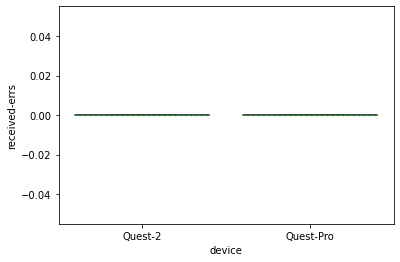

In [30]:
sns.boxplot(data=df, x='device', y='received-errs', showmeans=True, meanline=True)
plt.show()